# <center><b> Python Programming in Energy Science I</b></center>

## <center> Assignments A4, A5, A6 </center>

### <center>[Group 4]</center>
<center> Juan Manuel Boullosa Novo </center>
<center> Julia Guimaraes Zimmer </center>
<center> Jiah Ryu </center>
<center> Emre Atalan </center>

-------------------------------

## <center> Assignment A4 </center>
-------------------------------

## A4/E12. Array Calculations

Do not use loops over the time dimension for this exercise!

• Create a numpy array called t that represents N = 5000 time values between 0 and 60 seconds (both included).

• Create another single numpy array called data, which represents sin(ωt), cos(ωt) for the following choices of angular frequency: ω = 2π/60s, 2π/30s, 2π/100s, 2π/120s.

• Make one nice plot showing all of the lines (both functions, all frequencies) with a descriptive legend.

• Now add two more functions to the data: sin2  and cos2, by extending the corresponding dimension in thearray. Repeat the plotting, but now showing only the newly added quadratic functions.

• Sum all sin and sin2 functions, for all frequencies, into one new numpy array. Similarly sum all cos and cos2 results into another array. Plot both, and also their sum, into one plot.

### Documentation E12 
#we created a 2 arrays by using np.outer which is a numpy function computes  
#the outer product of two vectors which is refers here to (t,omega_values) with these 2 functions we calculate the sin and cos values for different
#angular frequencies over time (corresponds to colum)

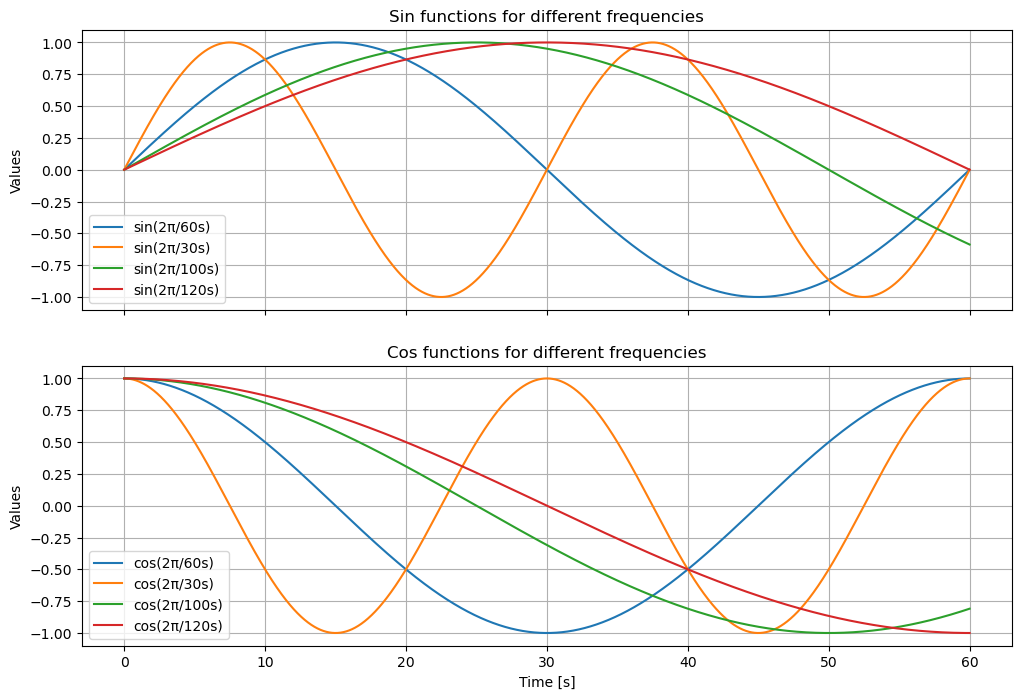

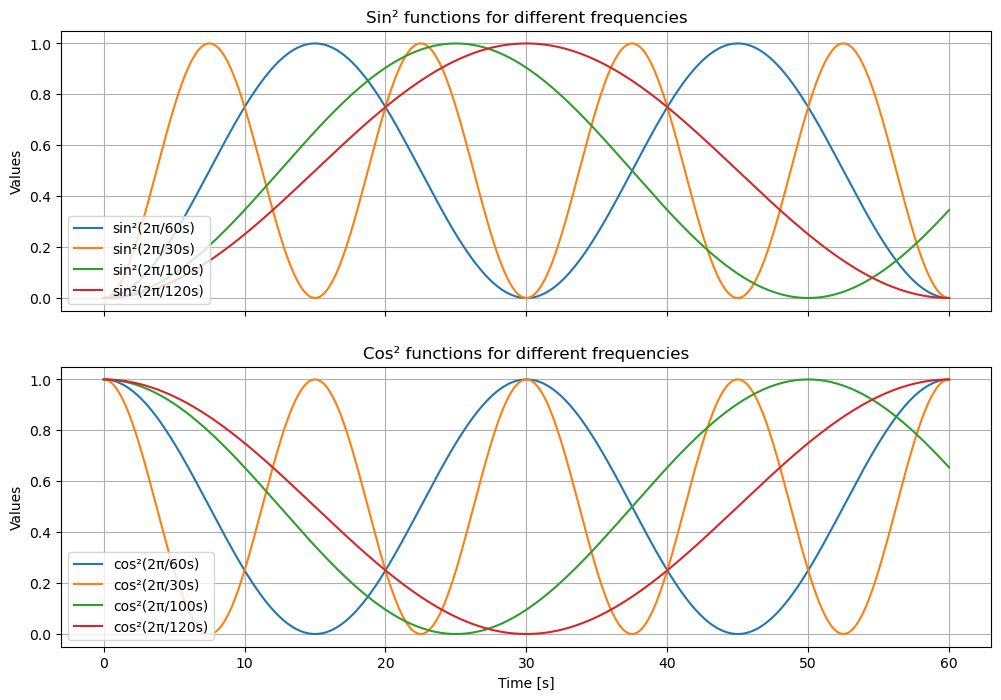

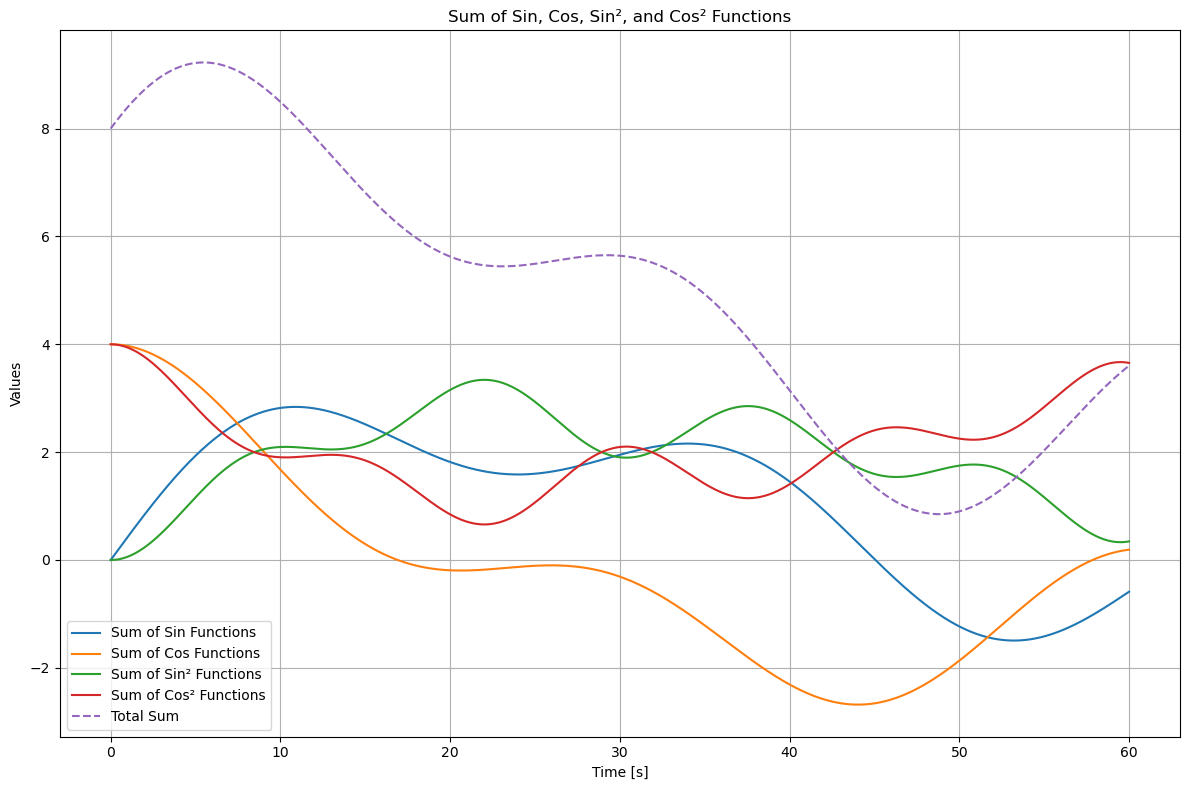

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create the time array
N = 5000   
t = np.linspace(0, 60, N)

# Define the angular frequencies
frequencies = [2 * np.pi / 60, 2 * np.pi / 30, 2 * np.pi / 100, 2 * np.pi / 120]

# Create the data array for sin(ωt) and cos(ωt)
sin_values = np.sin(np.outer(t, frequencies))
cos_values = np.cos(np.outer(t, frequencies))

# Combine the data into one array
data = np.concatenate([sin_values, cos_values], axis=1) #concatenation should happen along the columns

#Add sin2 and cos2 functions
sin2_values = np.square(sin_values) 
cos2_values = np.square(cos_values)

# Extend data array with sin2 and cos2 values
extended_data = np.concatenate([sin_values, cos_values, sin2_values, cos2_values], axis=1)

# Sum all sin and sin2, and all cos and cos2
sum_sin = np.sum(extended_data[:, :len(frequencies)], axis=1)
sum_cos = np.sum(extended_data[:, len(frequencies):2*len(frequencies)], axis=1)
sum_sin2 = np.sum(extended_data[:, 2*len(frequencies):3*len(frequencies)], axis=1)
sum_cos2 = np.sum(extended_data[:, 3*len(frequencies):4*len(frequencies)], axis=1)

#####################################################Plotting#####################################################################
#Plotting sin and cos for differnt frequencies 
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True) #sharex=True, all subplots have same x-axis range, ticks, and labels.

axs[0].plot(t, data[:, :len(frequencies)], label=[f'sin(2π/{int(round(2*np.pi/omega))}s)' for omega in frequencies])
axs[0].set_title("Sin functions for different frequencies")
axs[0].set_ylabel("Values")
axs[0].legend(loc='lower left')
axs[0].grid(True)

axs[1].plot(t, data[:, len(frequencies):2*len(frequencies)], label=[f'cos(2π/{int(round(2*np.pi/omega))}s)' for omega in frequencies])
axs[1].set_title("Cos functions for different frequencies")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Values")
axs[1].legend(loc='lower left')
axs[1].grid(True)

# Plotting only the quadratic functions
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(t, extended_data[:, 2*len(frequencies):3*len(frequencies)], label=[f'sin²(2π/{int(round(2*np.pi/omega))}s)' for omega in frequencies])
axs[0].set_title("Sin² functions for different frequencies")
axs[0].set_ylabel("Values")
axs[0].legend(loc='lower left')
axs[0].grid(True)

axs[1].plot(t, extended_data[:, 3*len(frequencies):4*len(frequencies)], label=[f'cos²(2π/{int(round(2*np.pi/omega))}s)' for omega in frequencies])
axs[1].set_title("Cos² functions for different frequencies")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Values")
axs[1].legend(loc='lower left')
axs[1].grid(True)

# Plot the sums
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t, sum_sin, label='Sum of Sin Functions')
ax.plot(t, sum_cos, label='Sum of Cos Functions')
ax.plot(t, sum_sin2, label='Sum of Sin² Functions')
ax.plot(t, sum_cos2, label='Sum of Cos² Functions')
ax.plot(t, sum_sin + sum_cos + sum_sin2 + sum_cos2, label='Total Sum', linestyle='--')
ax.set_title("Sum of Sin, Cos, Sin², and Cos² Functions")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Values")
ax.legend(loc='lower left')
ax.grid(True)

plt.tight_layout()
plt.show()


## A4/E13. Data Creation - Do not use loops for this exercise!


• Create a numpy array that represents dimensions (hour, minute, index, data), for a single day of measurements (hours: 0-23 minutes:0-59), where the index indicates 5 different weather stations and the data 3 data entries per location, filled with zeros of type np.float64. Print the shape and the dtype of your array. How many elements are contained in the array?

• Assume the 3 data entries represent solar irradiance in W/m2, temperature in Kelvin and wind speed in m/s at 10 m height respectively. Set all solar irradiance values to 250 W/m2, then replace all values for the time between 9 PM and 5 AM to zero. Check that this worked as intended, by printing appropriate slices.

• Create another numpy array representing dimensions (minute, index) with random values between 3 and 8 m/s. Set all wind speed data for all stations to that data, such that it repeats every hour. Check that this worked as intended, by printing appropriate slices.

• Fill the temperature data with random values between 5 and 20 degrees Celsius (translate that into Kelvin). Station 2 has some problem during nights, so replace all temperatures by np.nan between 9 PM and 5 AM. Station 0 and 1 do not work correctly at high wind speeds, so replace the temperature by np.nan whenever the wind speed is above or equal 6 m/s for those stations. Again, check that this worked as intended.

INFOS FOR THE CODE:

**INFO 1:** 
- 5 = 5 wheather stations; 
- 3 = [solar irradiance], [temperature],[wind speed]
- 24 = [solar irradiance: [hour1][hour2]...[hou24]]; [temp.: [hour1][hour2]...[hou24]]...
- 60 = [solar irradiance: hour1: min1, min2,.., min60]

In [2]:
import numpy as np
#########################13.1#############################
# Create the main array with the specified shape, full with zeros: (INFO 1)
main_array = np.zeros((5, 3, 24, 60), dtype=np.float64) #our representation: (index, data, hour, minute)

# print the shape and type of the array
print(f"13.1: Main array has the shape = {main_array.shape} type = {type(main_array)}")

# How many elements are contained in the array
print("13.1: Elements inside the array: ", main_array.size,"\n")

#########################13.2#############################
# Set all solar irradiance values to 250 W/m2
main_array[:, 0, :, :] = 250.0

# Change the first 6 and the last 3 values to zero: 
main_array[:, 0, :6, :] = 0.0 #from 00:00 to 05:00 am 
main_array[:, 0, -3:, :] = 0.0 #from 09:00 pm to 00:00 am 

#printing all 5 stations, 1st array = solar irr., at 09:00 pm (21)
print("13.2: Check solar irradiance 21:00 (all stations):\n", main_array[:,0,21,:],"\n") 

# printing all 5 stations, 1st array = solar irr., at 08:00 pm (20)
print("13.2: Check solar irradiance 20:00 (all stations):\n", main_array[:,0,20,:], "\n") 

#########################13.3#############################
#create array with random wind speeds btw. 3 - 8
wind_speed_array = np.random.uniform(3, 8, (5, 60))
wind_speed_array_reshaped = wind_speed_array.reshape(5, 1, 60) #reshape
main_array[:, 2, :, :] = wind_speed_array_reshaped #set wind speeds in the main array

#check if wind speed is in main: 
print("13.3: Wind speeds at station 1 at 21:00 and 22:00:", main_array[0,2,[21,22],:] ,"\n", 
     "\n", "station 2 at 21:00 and 22:00::\n",  main_array[1,2,[21,22],:],"\n")

#########################13.4#############################
#fill in temperature values 
temperature_array = np.random.randint(5,20,(5, 24, 60))+273.15
main_array[:, 1, :, :] = temperature_array

#problems of station 2:
main_array[2, 1, :6, :] = np.nan #from 00:00 to 05:00 am 
main_array[2, 1, -3:, :] = np.nan #from 09:00 pm to 00:00 am 

#problems with station 0 and 1: 
main_array[0, 1,:,:,][main_array[0,2,:,:]>= 6] = np.nan
main_array[1, 1,:,:,][main_array[1,2,:,:]>= 6] = np.nan

print("13.4: Temperatures at station 2 at 20:00 and 21:00:\n", main_array[2,1,[20,21],:], 
      "\n", "13.4:Temp. at station 0 at 20:00:\n",  main_array[0,1,[20],:], "\n"
      "\n", "13.4: temp.s at station 1 at 21:00:\n",  main_array[1,1,[21],:],"\n"
      "\n", "Wind Speed at station 1 at 21:00:",  main_array[1,2,[21],:],"\n")

13.1: Main array has the shape = (5, 3, 24, 60) type = <class 'numpy.ndarray'>
13.1: Elements inside the array:  21600 

13.2: Check solar irradiance 21:00 (all stations):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 

## A4/E14. Wind Farm Data: Part 1


The provided data file results_farm.csv.gz has a single header line, stating the column names: 

State,turbine,YAW,WD,AMB_WS,WS,AMB_P,P GY,NY,P75,P90,EFF,WLOSS 

The State column contains integer numbers, indexing 30-minute time average data (the time stamp itself has been removed, since it is not needed here).

• Read the file results_farm.csv.gz into a numpy.ndarray, ignoring the first row (i.e., the above header line). Print the first 10 rows of data. Note that you do not need to extract the gz file before reading it with numpy.

• Select the subset of the data for which the produced power is zero. What is the maximal ambient wind speed AMB_WS in this subset? What the minimal wake-corrected wind speed WS in another subset with power greater than zero? The data unit in both cases is m/s

• How many turbines are in the wind farm? Create a separate numpy array for each turbine (use at most a single loop). Then, find out how much mean power P was produced by each turbine with respect to the states. The unit of P in the data is kW. How high is the annual energy production (AEP) in GWh based on this data for the whole farm?

#### Documentation E14 
- E14.3: unique function: For example, if your turbine indices are like [0, 1, 2, 0, 1, 3], then unique_turbines will be [0, 1, 2, 3]. This allows us to iterate over each unique turbine in the subsequent loop and perform operations specific to each turbine.

In [3]:
import numpy as np
###################################E14.1####################################
# Read the CSV file using numpy and skip the header
fname = 'results_farm.csv.gz'
data_array= np.genfromtxt(fname,delimiter=',', skip_header=1)

print(f"E14.1: Data_array_shape: {data_array.shape}\n \n")
print(f"E14.1: The first 10 rows of the data:\n {data_array[:10, :]}")
###################################E14.2####################################

# Extract the relevant columns
ambient_wind_speed = data_array[:, 4]  # AMB_WS column
wake_corrected_wind_speed = data_array[:, 5]  # WS column
produced_power = data_array[:, 7]  # P column - power 

# Subset with produced power equal to zero
zero_power_subset = data_array[produced_power == 0]
max_ambient_wind_speed_zero_power = np.max(zero_power_subset[:, 4]) #cut out ws 

# Subset with power greater than zero
positive_power_subset = data_array[produced_power > 0]
min_wake_corrected_wind_speed_positive_power = np.min(positive_power_subset[:, 5]) # cut in ws 

# Print the results
print("E14.2: Maximal ambient wind speed (AMB_WS) when produced power is zero:", max_ambient_wind_speed_zero_power, "m/s")
print("E14.2: Minimal wake-corrected wind speed (WS) when power is greater than zero:", min_wake_corrected_wind_speed_positive_power, "m/s\n\n")

###################################E14.3####################################
# Extract unique turbine IDs from the 'turbine' column 
unique_turbines = np.unique(data_array[:, 1])

# Print the number of turbines in the wind farm
num_turbines = len(unique_turbines)
print(f'E14.3: The wind farm has {num_turbines} turbines.')

#Create a 3D numpy array to store separate 2D arrays for each turbine shape: (67, 3001, 14)
turbine_3d = np.zeros((num_turbines, data_array.shape[0] // num_turbines, data_array.shape[1]), dtype=np.float64)

# Fill the turbine_3d array with the data from data_array (filtered)
for i, turbine_id in enumerate(unique_turbines):
    turbine_data = data_array[data_array[:, 1] == turbine_id]       #turbine_data contains only data from current turbine 
    turbine_3d[i, :, :] = turbine_data                              #assigns each turbine i in one array

#test: print the shape and type of the 3_d array
print(f"E14.3.: turbine_3d type = {type(turbine_3d)}, shape of turbine_3d = {turbine_3d.shape}\n")

# Extract relevant columns from turbine_3d
power_data = turbine_3d[:, :, 7]  # Assuming 'P' column is at index 7

# Calculate mean power produced by each turbine with respect to the states
mean_power = np.mean(power_data, axis=1) #np array with 1 axis (67,)
annual_hours_with_wind = 24*365

# Calculate annual energy production (AEP) for the whole farm 
aep_kwh = np.sum(mean_power) * annual_hours_with_wind
aep_gwh = aep_kwh / 1e6

# Print mean power produced by each turbine with respect to the states
print("E14.3: Mean Power by State:")
for i, mean_power in enumerate(mean_power):
    print(f"Turbine {i+1}: {mean_power:.2f} kW")

# Print annual energy production (AEP) for the whole farm
print(f"\nE14.3: Annual Energy Production (AEP) for the whole farm: {aep_gwh:.2f} GWh")

E14.1: Data_array_shape: (201067, 14)
 

E14.1: The first 10 rows of the data:
 [[0.000000e+00 0.000000e+00 2.440605e+02 2.440605e+02 1.562020e+01
  1.562020e+01 6.300000e+03 6.300000e+03 3.150000e+00 3.150000e+00
  3.001200e+00 2.867300e+00 1.000000e+00 0.000000e+00]
 [0.000000e+00 1.000000e+00 2.440605e+02 2.440605e+02 1.562020e+01
  1.488900e+01 6.300000e+03 6.300000e+03 3.150000e+00 3.150000e+00
  3.001200e+00 2.867300e+00 1.000000e+00 0.000000e+00]
 [0.000000e+00 2.000000e+00 2.440605e+02 2.440605e+02 1.562020e+01
  1.515430e+01 6.300000e+03 6.300000e+03 3.150000e+00 3.150000e+00
  3.001200e+00 2.867300e+00 1.000000e+00 0.000000e+00]
 [0.000000e+00 3.000000e+00 2.440605e+02 2.440605e+02 1.562020e+01
  1.562020e+01 6.300000e+03 6.300000e+03 3.150000e+00 3.150000e+00
  3.001200e+00 2.867300e+00 1.000000e+00 0.000000e+00]
 [0.000000e+00 4.000000e+00 2.440605e+02 2.440605e+02 1.562020e+01
  1.538940e+01 6.300000e+03 6.300000e+03 3.150000e+00 3.150000e+00
  3.001200e+00 2.867300e+00 1.

## A4/E15. Wind Farm Part 2

• Read the data from E14 into a single numpy array, as described there.

• Create a simple line plot, showing the mean ambient power AMB_P and the mean produced power P wrt. the states, as a function of turbine index. Include axes labels, a legend and a title.

• Replace all values of the wind turbine efficiency EFF by np.nan if they are zero (or below). Then create a 2D pcolormesh plot that shows the variable EFF as a function of turbine on x-axis and state on the y-axis, with coordinate (0, 0) in the lower left corner. Make the plot as pretty as you can, e.g., add axes labels, a title, and a color bar. Follow the lecture on matplotlib, but please, no red lines between the data squares.


• Similarly, create two beautiful pcolormesh plots showing the wind speed WS and the produced power P. Use different color maps for each of the latter three 2D-plots, and always show color bars. You may also use other ways of visualizing this 2D data than pcolormesh, if you prefer (but please not just a bunch of single lines).


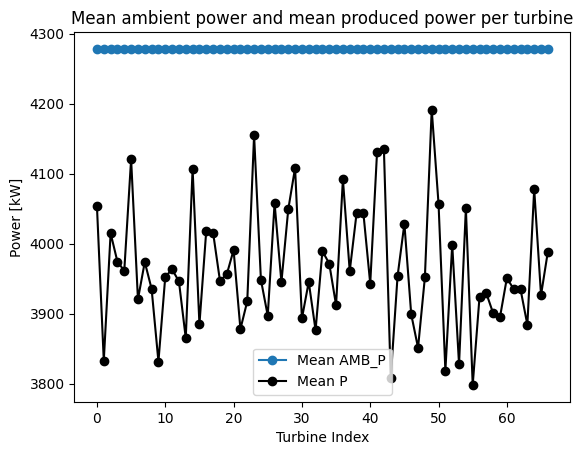

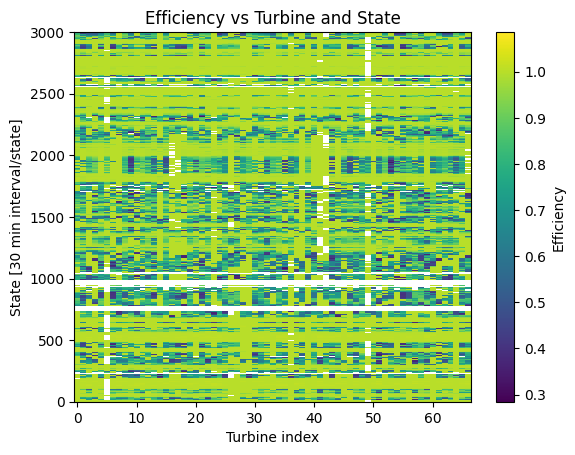

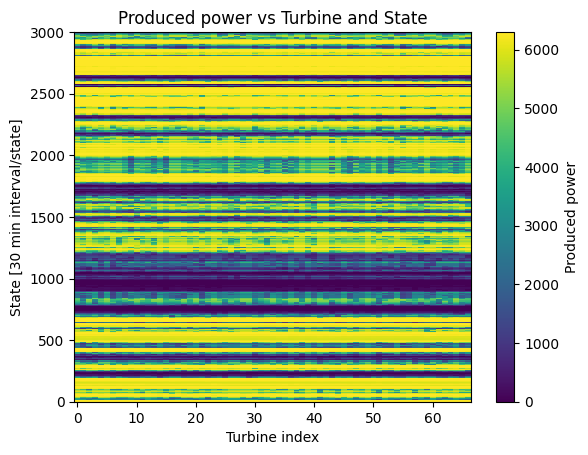

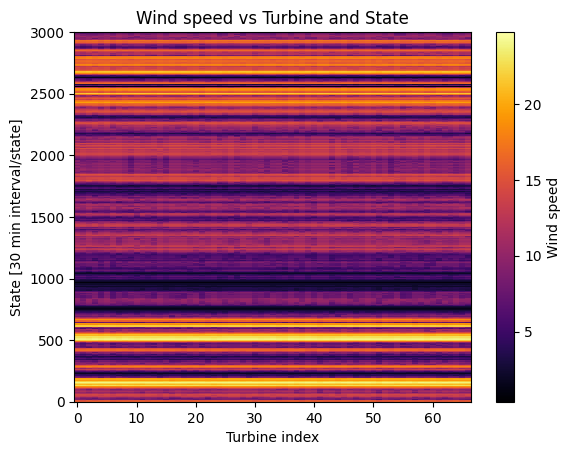

In [11]:
###################################E15.1 ####################################
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant columns from turbine_3d
power_data = turbine_3d[:, :, 7]  # Assuming 'P' column is at index 7
AMB_power_data = turbine_3d[:, :, 6]

# Calculate mean power produced by each turbine with respect to the states
mean_power = np.mean(power_data, axis=1) #np array with 1 axis (67,)
AMB_mean_power = np.mean(AMB_power_data, axis=1) 
turbine_indices = np.arange(67) # Create an array of indices (turbine indices)

#plot mean amb and mean P 
plt.figure()
plt.plot(turbine_indices, AMB_mean_power, marker='o', linestyle='-', label='Mean AMB_P')
plt.plot(turbine_indices, mean_power,marker='o', linestyle='-',  label='Mean P', color= "k")
plt.xlabel('Turbine Index') 
plt.ylabel('Power [kW]')
plt.title('Mean ambient power and mean produced power per turbine')
plt.legend()
plt.show()

###################################E15.2####################################
turbine_3d[:,:,12][turbine_3d[:,:,12] <= 0] = np.nan #array[selected area[condition]

#2D plot of EFF vs turbine and state
plt.figure()
plt.pcolormesh(turbine_3d[:,:,1], turbine_3d[:,:,0], turbine_3d[:,:,12])
plt.xlabel('Turbine index')
plt.ylabel('State [30 min interval/state]')
plt.title('Efficiency vs Turbine and State')
plt.colorbar(label='Efficiency')
plt.show()

###################################E15.3####################################
#2D plot of power vs turbine and state
plt.figure()
plt.pcolormesh(turbine_3d[:,:,1], turbine_3d[:,:,0], turbine_3d[:,:,7], cmap='viridis')
plt.xlabel('Turbine index')
plt.ylabel('State [30 min interval/state]')
plt.title('Produced power vs Turbine and State')
plt.colorbar(label='Produced power')
plt.show()

plt.figure()
plt.pcolormesh(turbine_3d[:,:,1], turbine_3d[:,:,0], turbine_3d[:,:,5], cmap='inferno')
plt.xlabel('Turbine index')
plt.ylabel('State [30 min interval/state]')
plt.title('Wind speed vs Turbine and State')
plt.colorbar(label='Wind speed')
plt.show()

In [ ]:
#TEST PRINTS
####################################E15.1 ####################################
print(data_array[2000:3000,6]) #Ex.:60:120: specifies from index 60 to 119


#little test2:
if np.array_equal(turbine_3d[50, :, 6], turbine_3d[7, :, 6]):
    print("They are the same values")
else:
   print("They are different")

## A4/E16 Topography Data

Solve the whole exercise without using loops.

• Read the data contained in the above file into memory.

• Select the subset of points whose horizontal distance from the position p0 = (513196.5, 5689695.0) is less
than radius r = 5 km.


• Store the selected data into a new file RoedeserBerg.pts.gz in the same format as the original file. How
many points are stored in the file?

• Visualize the selected topography data using matplotlib or a sub-package. Additionally store the resulting
graphic into a png file RoedeserBerg.png

Number of points stored in the file: 645568


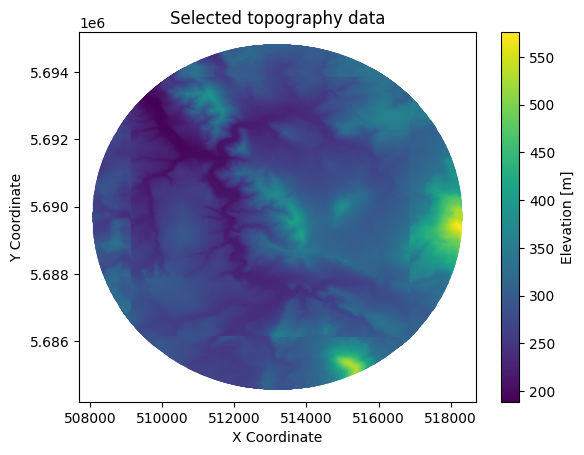

In [12]:
import numpy as np
import matplotlib.pyplot as plt

topo_fname = "RoedeserBerg_large.pts.gz"
topo_data = np.genfromtxt(topo_fname, delimiter = '')

p0 = np.array([513196.5, 5689695.0])
radius = 5000  

# Compute the horizontal distance from p0
distances = np.sqrt(np.sum((topo_data[:, :2] - p0) ** 2, axis=1))
selected_data = topo_data[distances < radius]

selected_fname = 'RoedeserBerg.pts.gz'
np.savetxt(selected_fname, selected_data)

num_points = selected_data.shape[0] #number of rows; if [1] then number of columns and .shape, the whole dimension
print(f'Number of points stored in the file: {num_points}')

# Plot 
plt.scatter(selected_data[:, 0], selected_data[:, 1], c=selected_data[:, 2]) #x,y and c= marker colors(elevation)
plt.colorbar(label='Elevation [m]')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Selected topography data')


plt.savefig('RoedeserBerg.png', dpi=300)
plt.show()

In [13]:
#TESTS
print(topo_data.shape)
print(f"form of array with selected data: {selected_data.shape}")

(3788342, 3)
form of array with selected data: (645568, 3)


-------------------------------
## <center> Assignment A5 </center>
-------------------------------

## A5/E1: APP based on the timeseries

APP based on the entire timeseries, which has N the total number of time steps.

Notes for A5/E1: 
- Check for NaN values: nan_mask = np.isnan(array_xy)
- Get indices of NaN values: nan_indices = np.where(nan_mask)[0]

In [ ]:
import numpy as np
from scipy import interpolate

# Function to load data from a CSV file
def load_csv_data(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=1)

# Function to determine cut-in and cut-out wind speeds
def get_cut_in_out_ws(power_curve_data):
    ws = power_curve_data[:, 0]
    cp = power_curve_data[:, 3]
    cut_in_ws = ws[cp > 0].min() 
    cut_out_ws = ws[cp > 0].max()
    return cut_in_ws, cut_out_ws

# Interpolation function to deal with the NaN values:
def interpolate_nan_values(data):
    mask = np.isnan(data)
    indices = np.where(~mask)[0] #0 to get only the indices where the values are not (~) nan1
    f = interpolate.interp1d(indices, data[indices])
    data[mask] = f(np.where(mask)[0])
    return data

# Function to calculate windspeed in timeseries data
def calculate_ws_from_uv(timeseries_data):
    U_timeseries = interpolate_nan_values(timeseries_data[:, 1]) 
    V_timeseries = interpolate_nan_values(timeseries_data[:, 2]) 
    ws_timeseries = np.sqrt(U_timeseries**2 + V_timeseries**2)
    return ws_timeseries

# Function to interpolate cp
def cp_interpolation(power_curve_data):
    ws = power_curve_data[:, 0]
    cp = power_curve_data[:, 3]
    cp_i = interpolate.interp1d(ws, cp)
    return cp_i

# Function to calculate APP based on entire time series
def calculate_APP_entire_timeseries(ws, cp_i):
    valid_ws_range = (ws >= cut_in_ws) & (ws <= cut_out_ws)
    valid_ws = ws[valid_ws_range]
    cp = cp_i(valid_ws)
    delta_t = 10 / 60  # 10 min in 1h
    power = 0.5 * rho * A * cp * valid_ws ** 3 * delta_t
    APP = np.sum(power) / T
    return APP

# Parameters
rho = 1.225  # density [kg/m^3]
D = 82  # rotor_diameter [m]
A = np.pi * (D / 2) ** 2  # swept area [m^2]
T = 8760  # total hours/years [h]

#Execution
power_curve_data = load_csv_data('A5/files/Senvion_MM82.csv')
timeseries_data = load_csv_data('A5/files/timeseries_la_haute_borne_2017.csv')

cut_in_ws, cut_out_ws = get_cut_in_out_ws(power_curve_data)
ws_timeseries = calculate_ws_from_uv(timeseries_data)

cp_i =cp_interpolation(power_curve_data)

APP_ET = calculate_APP_entire_timeseries(ws_timeseries, cp_i)
print(f"The APP based on the entire timeseries is: {APP_ET/1000:.2f} kW")

## A5/E2. APP based on average wind speed

APP based on the average wind speed U¯ and cp = cp(U¯), with respect to the entire timeseries.


In [ ]:
import numpy as np
from scipy import interpolate

# Function to load data from a CSV file
def load_csv_data(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=1)

# Function to determine cut-in and cut-out wind speeds
def get_cut_in_out_ws(power_curve_data):
    ws = power_curve_data[:, 0]
    cp = power_curve_data[:, 3]
    cut_in_ws = ws[cp > 0].min() 
    cut_out_ws = ws[cp > 0].max()
    return cut_in_ws, cut_out_ws

# Interpolation function to deal with the NaN values:
def interpolate_nan_values(data):
    mask = np.isnan(data)
    indices = np.where(~mask)[0] #0 to get only the indices where the values are not (~) nan1
    f = interpolate.interp1d(indices, data[indices])
    data[mask] = f(np.where(mask)[0])
    return data

# Function to calculate windspeed in timeseries data
def calculate_ws_from_uv(timeseries_data):
    U_timeseries = interpolate_nan_values(timeseries_data[:, 1]) 
    V_timeseries = interpolate_nan_values(timeseries_data[:, 2]) 
    ws_timeseries = np.sqrt(U_timeseries**2 + V_timeseries**2)
    return ws_timeseries

# Function to interpolate cp
def cp_interpolation(power_curve_data):
    ws = power_curve_data[:, 0]
    cp = power_curve_data[:, 3]
    cp_i = interpolate.interp1d(ws, cp)
    return cp_i

# Function to calculate APP based on average wind speed
def calculate_APP_average_ws(ws, cp_i):
    valid_ws_range = (ws >= cut_in_ws) & (ws <= cut_out_ws)
    valid_ws = ws[valid_ws_range]
    average_ws = np.mean(valid_ws)
    cp = cp_i(average_ws)
    APP = 0.5 * rho * A * cp * average_ws ** 3 
    return APP


# Parameters
rho = 1.225  # density [kg/m^3]
D = 82  # rotor_diameter [m]
A = np.pi * (D / 2) ** 2  # swept area [m^2]

#Execution
power_curve_data = load_csv_data('A5/files/Senvion_MM82.csv')
timeseries_data = load_csv_data('A5/files/timeseries_la_haute_borne_2017.csv')

cut_in_ws, cut_out_ws = get_cut_in_out_ws(power_curve_data)
ws_timeseries = calculate_ws_from_uv(timeseries_data)

cp_i =cp_interpolation(power_curve_data)

APP_avg_ws = calculate_APP_average_ws(ws_timeseries, cp_i)
print(f"The APP based on the average windspeed is: {APP_avg_ws/1000:.2f} kW")

## A5/E3: APP based on binned timeseries

APP based on binned timeseries wind speed data (∆u = 0.5 m/s bin width, total number of bins N, normalized
frequency Pi.

In [ ]:
import numpy as np
from scipy import interpolate

# Function to load data from a CSV file
def load_csv_data(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=1)

# Function to determine cut-in and cut-out wind speeds
def get_cut_in_out_ws(power_curve_data):
    ws = power_curve_data[:, 0]
    cp = power_curve_data[:, 3]
    cut_in_ws = ws[cp > 0].min() 
    cut_out_ws = ws[cp > 0].max()
    return cut_in_ws, cut_out_ws

# Interpolation function to deal with the NaN values:
def interpolate_nan_values(data):
    mask = np.isnan(data)
    indices = np.where(~mask)[0] #0 to get only the indices where the values are not (~) nan1
    f = interpolate.interp1d(indices, data[indices])
    data[mask] = f(np.where(mask)[0])
    return data

# Function to calculate windspeed in timeseries data
def calculate_ws_from_uv(timeseries_data):
    U_timeseries = interpolate_nan_values(timeseries_data[:, 1]) 
    V_timeseries = interpolate_nan_values(timeseries_data[:, 2]) 
    ws_timeseries = np.sqrt(U_timeseries**2 + V_timeseries**2)
    return ws_timeseries

# Function to interpolate cp
def cp_interpolation(power_curve_data):
    ws = power_curve_data[:, 0]
    cp = power_curve_data[:, 3]
    cp_i = interpolate.interp1d(ws, cp)
    return cp_i

# Function to digitize wind speed time series
def digitize_wind_speed(ws_timeseries):
    bins = np.arange(cut_in_ws, cut_out_ws, delta_u) 
    wind_speed_index_column = np.digitize(ws_timeseries, bins) # Add a new column for wind speed index
    ws_timeseries_extended = np.column_stack((ws_timeseries, wind_speed_index_column))  # Add the new column to existing arrayl
    return ws_timeseries_extended, wind_speed_index_column

# Function to calculate normalized frequencies for each bins
def calculate_normalized_frequencies(ws_timeseries, wind_speed_index_column, delta_u, cut_in_ws):
    bin_counts = {} #dict with counts for every ws btw cut_in and cut_out in 0.5 steps 
    for bin_index in wind_speed_index_column: 
        bin_counts[bin_index] = bin_counts.get(bin_index, 0) + 1 #+ 1 to jump to the next index: {0: 13515, 1: 3617...,}
    total_count = len(ws_timeseries[:, 0])

    normalized_frequencies = {}
    for bin, count in bin_counts.items():
        weighted_value = bin * delta_u + cut_in_ws #representative value for the bin: example: bin 0 = ws 4.0 
        normalized_frequency = count / total_count #normalized frequency for the bin
        normalized_frequencies[weighted_value] = normalized_frequency #result to dict: how often we have for ex.: 4.0 m/s in freq.: 4.0: 0.23073

    return normalized_frequencies

# Function to calculate APP based on binned timeseries
def calculate_APP_binned_timeseries(normalized_frequencies, cp_i):
    APP = 0
    APP = sum(0.5 * P_i * rho * cp_i(bin_center) * A * bin_center**3 for bin_center, P_i in normalized_frequencies.items())

    print(f"The APP based on the binned timeseries is: {APP/1000:.2f} kW")

    return APP

# Parameters
rho = 1.225  # Air density [kg/m^3]
D = 82  # Rotor diameter [m]
A = np.pi * (D / 2) ** 2  # Swept area [m^2]
delta_u = 0.5 # m/s bin width

#Execution
power_curve_data = load_csv_data('A5/files/Senvion_MM82.csv')
timeseries_data = load_csv_data('A5/files/timeseries_la_haute_borne_2017.csv')

cut_in_ws, cut_out_ws = get_cut_in_out_ws(power_curve_data)
cp_i =cp_interpolation(power_curve_data)

ws_timeseries = calculate_ws_from_uv(timeseries_data)
ws_timeseries_extended, wind_speed_index_column = digitize_wind_speed(ws_timeseries)
normalized_frequencies = calculate_normalized_frequencies(ws_timeseries_extended, wind_speed_index_column, delta_u, cut_in_ws)


APP_BT = calculate_APP_binned_timeseries(normalized_frequencies, cp_i)

## A5/E4: Fit of the Weilbull Curve and determine APP from it 

Fit a Weibull curve (use Python of course, search the internet) to the given timeseries and calculate the APP
from the fitted curve. Include a plot shows the histogram and the fitted Weibull distribution, where U is the wind speed and A is the rotor area of the turbine. Here P is the fitted Weibull probability density function. Note that both cp and P are functions of U

### Documentation of Exercise A5/E4
### Weilbull Things: 
- weibull_min.fit(ws_data, floc=0): This part of the code fits a Weibull distribution to the wind speed data (ws_data). The fit method of the weibull_min distribution estimates the shape, location, and scale parameters of the Weibull distribution that best fit the provided data.
- shape, _, scale: The result of the fit method is a tuple containing the estimated parameters. In this case, shape represents the shape parameter of the Weibull distribution, and scale represents the scale parameter. The underscore _ is used to discard the estimated location parameter (floc), as it is fixed at 0 in this case.
- The weibull_pdf function defines the probability density function (PDF) for a Weibull distribution. function that describes the likelihood of a continuous random variable falling within a particular range of values.

### Integration of weilbull:
- integrate.quad(): This function is used for adaptive quadrature (numerical integration) in scipy. It estimates the definite integral of a function.
- integrand: The function to be integrated. In this case, APP formular with weilbull probaility density inside
- psabs=1e-05 and epsrel=1e-05: The absolute and relative tolerances for the integral. These parameters control the accuracy of the integration result
- The loc parameter is typically set to zero (default) and represents a potential shift of the distribution.
The floc parameter is used to fix the location parameter at a specific value during the fitting process

In [ ]:
import numpy as np
from scipy.stats import weibull_min
import scipy.integrate as integrate
from scipy import interpolate
import matplotlib.pyplot as plt

class APP_Processor:
    T = 8760  # total hours/years [h]

    def __init__(self, timeseries_file, power_curve_file, rho=1.225, D=82): #constructer of the class 
        self.rho = rho  # air density [kg/m^3]
        self.D = D  # rotor diameter [m]
        self.A = np.pi * (self.D/2)**2  # swept area [m^2]
        self.timeseries_data = np.genfromtxt(timeseries_file, delimiter=',', skip_header=1)
        self.power_curve_data = np.genfromtxt(power_curve_file, delimiter=',', skip_header=1)
        self._timeseries_windspeed = None
        self._cut_in_windspeed = None
        self._cut_out_windspeed = None
        self._cp_interpolated = None
        self._shape = None
        self._scale = None
 
    # INTERPOLATE NAN VALUES IN TIMESERIES DATA
    def interpolate_nan_values(self, data):
        mask = np.isnan(data) # boolean mask for nan values
        indices = np.where(~mask)[0] #0 to get only the indices where the values are NOT (~) nan /~ bitwise not operator!!!!!
        if indices.size > 0:
            f = interpolate.interp1d(indices, data[indices]) 
            data[mask] = f(np.where(mask)[0]) # replace nan values by interpolated values
        return data

    def calculate_windspeed(self, u_component, v_component):
        return np.sqrt(u_component**2 + v_component**2)

    def timeseries_windspeed(self):
        if self._timeseries_windspeed is None: #none is making sure we don't run this function for one instance several times 
            u_component = self.interpolate_nan_values(self.timeseries_data[:, 1])
            v_component = self.interpolate_nan_values(self.timeseries_data[:, 2])
            self._timeseries_windspeed = self.calculate_windspeed(u_component, v_component)
        return self._timeseries_windspeed

    def cut_in_windspeed(self):
        if self._cut_in_windspeed is None:
            self._cut_in_windspeed = self.power_curve_data[self.power_curve_data[:, 3] > 0, 0].min()
        return self._cut_in_windspeed

    def cut_out_windspeed(self):
        if self._cut_out_windspeed is None:
            self._cut_out_windspeed = self.power_curve_data[self.power_curve_data[:, 3] > 0, 0].max()
        return self._cut_out_windspeed

    def cp_interpolated(self):
        if self._cp_interpolated is None:
            self._cp_interpolated = interpolate.interp1d(self.power_curve_data[:, 0], self.power_curve_data[:, 3])
        return self._cp_interpolated

    def calculate_weibull_fit(self):
        if self._shape is None or self._scale is None:
            self._shape, _, self._scale = weibull_min.fit(self.timeseries_windspeed(), floc=0) # floc=0 => location parameter defaults to 0
        return self._shape, self._scale

    def weibull_pdf(self, ws):
        shape, scale = self.calculate_weibull_fit()
        return weibull_min.pdf(ws, shape, loc=0, scale=scale)

    def integrand(self, U):
        P = self.weibull_pdf(U)
        return 0.5 * P * self.rho * self.cp_interpolated()(U) * self.A * (U**3)

    def calculate_APP(self):
        APP, error = integrate.quad(self.integrand, self.cut_in_windspeed(), self.cut_out_windspeed(), limit=100, epsabs=1e-05, epsrel=1e-05)
        return APP, error

    def plot(self):
        plt.hist(self.timeseries_windspeed(), bins=50, density=True, alpha=0.6, color='b')
        xmin, xmax = self.timeseries_windspeed().min(), self.timeseries_windspeed().max()
        x = np.linspace(xmin, xmax, 100)
        p = weibull_min.pdf(x, self._shape, loc=0, scale=self._scale)
        plt.plot(x, p, 'k', linewidth=2)
        plt.xlabel('Wind Speed')
        plt.ylabel('Probability Density')
        plt.show()

rho = 1.225  # air density [kg/m^3]
D = 82  # rotor diameter [m]
E4_Data = APP_Processor('timeseries_la_haute_borne_2017.csv', 'Senvion_MM82.csv', rho, D)
APP, error = E4_Data.calculate_APP()
print(f"APP: {APP/1000} kW")
print(f"Estimated error: {error/1000} kW")
E4_Data.plot()

### E5: Drainage of the Water Tank 

A hydrogen production station, assume that you have a large cylindrical tank with diameter D, with initial
water level h0. The tank is connected to an electrolyzer by a pipe of diameter d. Solve the above initial value problem and plot the variation of h up to one hour. Use D = 20m, d = 0.5, g =
9.8m/s2
, h0 = 25m. Compare your answer with the analytical solution

#### Documentation for A5/E5:

- message: The solver successfully reached the end of the integration interval. - The numerical solver completed the integration successfully, reaching the specified end time.
- success: True - The integration process was successful without encountering errors.
- status: 0 - The solver status indicating successful completion without issues.
- sol: None - The solution object is not available: no errors during calc. solution
- t_events: None - There are no specific event times specified for the solver to track.
- y_events: None - same for y 
- nfev: 2174 - The number of evaluations of the system of ordinary differential equations (ODEs) during the integration process.
- njev: 0 - The number of Jacobian matrix evaluations during the integration (Jacobian is not used, as it's 0).
- nlu: 0 - The number of LU (lower-upper) factorizations during the integration (0 indicates none performed).

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Given parameters
D = 20 # diameter of the tank
h0 = 25  # initial water level h(t=0)=h0
g = 9.8  # acceleration due to gravity
d = 0.5  # diameter of the pipe
t_max = 3600  # 1 hour in seconds
t = np.linspace(0, t_max, 100) # Time points

# Analytical solution
def analytical_solution(t):
    return (- np.sqrt(g / 2) * (d ** 2 / D ** 2) * t + np.sqrt(h0))**2

# Define the ODE model function
def numerical_solution(t,h):
    dhdt = -(np.sqrt(2 * g) * (d ** 2 / D ** 2) * np.sqrt(h))
    return dhdt

# Solve the ODE for the given parameters: 
h_solution = integrate.solve_ivp(numerical_solution, (0, t_max), [h0], max_step = 20)
print("Solution by the solve_ivp:\n\n", h_solution, "\n")

# Plotting
fig, ax = plt.subplots()

ax.plot(h_solution.t, h_solution.y[0,:], "+", label="numerical solution")
ax.plot(t, analytical_solution(t),  label= "analytical solution")

ax.legend()
ax.set_xlabel("time [s]")
ax.set_ylabel("Water Level h in m ")
plt.title('Variation of Water Level Over Time')
plt.show()

-------------------------------
## <center> Assignment A6 </center>
-------------------------------


## A6/ E1. Populating a Pandas DF from NP array 

(a) Create a 2 × 24 ndarray with random integer values in the range [0,20).

(b) Create a pandas DataFrame df with two columns named Data1 and Data2

• directly from the array

• from a dictionary created from the array

• from two pd.Series objects created from the individual array columns

(c) Insert a new column called DataProd which is the product of the other two columns.


In [ ]:
import numpy as np
import pandas as pd

#########################################E1.a#########################################
random_array = np.random.randint(0, 20, size=(2, 24)) #array shape: (2, 24)
#print(random_array)

#########################################E1.b#########################################
# directly from the array
df_direct = pd.DataFrame(random_array.T, columns=['Data1', 'Data2']) #T. for transpose 

#dict from np.array 
random_dict = {}
for index, values in enumerate(random_array):
    random_dict[f"Data {index + 1}"] = values 
df_dict = pd.DataFrame(random_dict)
print(random_dict)

# from two pd.Series objects created from the individual array columns
serie1_df = pd.Series(random_array[0,:])
serie2_df = pd.Series(random_array[1,:])

series_combined  = pd.DataFrame() 

# Now we can add the columns one-by-one:
series_combined["Data 1"] = serie1_df
series_combined["Data 2"] = serie2_df

print(f"E1.b1\n:{df_direct}")
print()
print(f"E1.b2\n:{df_dict}")  
print()
print(f"E1.b3\n:{series_combined}") 
#########################################E1.c#########################################

series_combined["DataProd"] = series_combined["Data 1"]*series_combined["Data 2"]
print("E1.c")
print(series_combined)


## A6/E2: Exporting and Importing Dataframe

(a) Change the data type of the columns to float.

(b) Export the dataframe as csv-file with two decimal places.

(c) Open the csv-file in an external editor. Manually add a column Error-Log. Add an entry Error for each time step if Data2 > 10. Leave the other rows blank.

(d) Load the new csv-file with pandas. Make sure to recover the index as index.

(e) Visualize the dataframe by using print(df). What happenend with the blank rows? Which datatype is your new column?


In [ ]:
#########################################E2.a#########################################
series_combined = series_combined.astype(np.float64)
#print(series_combined.dtypes) #print data type for whole dataframe

#########################################E2.b#########################################
series_combined.to_csv('series_df.csv', index=False, float_format='%.2f') #index= True or False to include / exclude the index column 

#########################################E2.d#########################################
df = pd.read_csv('series_df2.csv', delimiter=';')

# Print the DataFrame
print(df)

#what happened with the blank rows? 
print()
print(f"Data type of Error-cell: {type(df['Error-Log'][2])}") 
print(f"Data type of blank cell: {type(df['Error-Log'][0])}")  
print(f"Data type new column: {type(df['Error-Log'])}")


## A6/E3: NaN, Grouping and modifiyng 

(a) Replace all nan values in the Error-Log column by Okay.

(b) Use the group functionality to group the data into Okay and Error and calculate the mean values of both Data-columns when grouped.

(c) Set the index in df to the square product of the current index

(d) Replace the rows in the Data1, Data2 columns, that have an Error entry in the Error-Log column by np.nan (only use one line for the command)

In [ ]:
import pandas as pd
import numpy as np

# Read previously defined csv file with Error-Log column
df = pd.read_csv('series_df2.csv', delimiter=';')
# Replace empty cells in "Error-Log" column with NaN
df['Error-Log'] = df['Error-Log'].fillna('0kay') 
print("E3.a:\n", df, '\n')

# Group by 'Error-Log' and calculate mean of 'Data 1' and 'Data 2'
grouped_df = df.groupby('Error-Log')[['Data 1', 'Data 2']].mean()
print("E3.b:\n", grouped_df, '\n')

# Set the index to the square product of the current index
df.index = df.index ** 2

# Replace the rows in 'Data 1' and 'Data 2' that have 'Error' in 'Error-Log' with np.nan
df.loc[df['Error-Log'] == 'Error', ['Data 1', 'Data 2']] = np.nan
print(df)

## A6/E4: Time Series Data

- (a) Load the data file timeseries_la_haute_borne_2017.csv provided in exercise A5 with pandas. You will have to convert the index with pd.datetime(utc=True) to get a consistent datetime index.
- (b) Calculate the wind direction and wind speed and add them in two additional columns
- (c) How many NaN-values exist per column? In which months do the most NaN values occur?
- (d) Fill the NaN-values of the wind speed with the values of the previous time step. By how many percentage points does the mean wind speed change?

### Documetation E4
- timeseries_df.isnull(): creates a boolean DF: element is True if the corresponding element in timeseries_df is NaN and False otherwise.
- resample('M'): This part is using the resample method, which is typically used with time series data. It's specifying that the data should be resampled on a monthly frequency ('M'). DataFrame will be divided into monthly intervals, and operations will be performed within each month.
- .sum():sums up  boolean values for each month. True = 1 and False=0 when summed, counts number of True values (NaNs) for each month.


In [ ]:
import pandas as pd
import numpy as np

## Task (a)
# Load the data
timeseries_df = pd.read_csv('timeseries_la_haute_borne_2017.csv')
timeseries_df['Time'] = pd.to_datetime(timeseries_df['Time'], utc=True) #convert the 'time' column of the dataframe into datetime objects.
timeseries_df.set_index('Time', inplace=True) #designate a specific column as index

## Task (b)
# Calculate wind direction and wind speed
timeseries_df['Wind Speed'] = np.sqrt(timeseries_df['U']**2 + timeseries_df['V']**2)
timeseries_df['Wind Direction'] = (np.arctan2(timeseries_df['V'], timeseries_df['U'])* (180/np.pi) + 360) %360 # +360 to ensure all angles are positive, %360 (modulo operation) to bring all angles in the range of 0-359°

## Task (c)
# Count NaN values per column
nan_per_column = timeseries_df.isnull().sum() #Since sum() calculates as True=1 and False=0, you can count the number of NaN in each row and column by calling sum() on the result of isnull().
for column in nan_per_column.index:
    print(f"The number of NaN values in column {column} is {nan_per_column[column]}")
print()

# Count NaN values per month
nan_per_month = timeseries_df.isnull().resample('M').sum()
month_with_most_nans = nan_per_month.idxmax() # find the index of the maximum value for each column

for column in month_with_most_nans.index:
    month_name = month_with_most_nans[column].strftime('%B') #format the datetime object into a string representing the month's name
    print(f"The month with the most NaN values in column {column} is {month_name}")
print()

## Task (d)   
orig_mean_ws = timeseries_df['Wind Speed'].mean()
timeseries_df['Wind Speed'].fillna(method='ffill',inplace=True) # fill with the last valid value before NaN, modify the original df
new_mean_ws = timeseries_df['Wind Speed'].mean()

change_percentage = ((new_mean_ws - orig_mean_ws) / orig_mean_ws) * 100

print(f"the orginal mean wind speed was: {orig_mean_ws:.3f} m/s")
print(f"the new mean wind speed is: {new_mean_ws:.3f} m/s")
print(f"the difference in percentage is: {change_percentage:.2f} %")